## 실습

### 1. 영어, 수학, 과학 학습시간으로 합격, 불합격을 예측하시오.
        
        - 기존데이터
        - 영어(80), 수학(95), 과학(80) 합격(1)
        - 영어(67), 수학(88), 과학(75) 합격(1)
        - 영어(75), 수학(64), 과학(55) 불합격(0)
        - 영어(100), 수학(46), 과학(65) 불합격(0)
### 2. 영어(76), 수학(75), 과학(68) 일때 합격? 불합격?
### 3. 알고리즘 RandomForestClassifier 사용

In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [3]:
clf = RandomForestClassifier(random_state=1)

X = [[80,95,80],
    [67,88,75],
    [75,64,55],
    [100,46,65]]

y = [1,1,0,0] # classes of each sample

clf.fit(X,y)

clf.predict([[76,75,68]])

array([0])

In [4]:
!pip install seaborn

In [38]:
import seaborn as sns

In [39]:
iris = sns.load_dataset("iris")
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [40]:
iris.head(5) # 첫 4열로 species열 값 구해기

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [41]:
X = iris.drop("species",axis=1) ;X.head() # ;는 명령문을 나눠주는 것
                                          #axis=0 행, axis=1 열을 지운다

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [42]:
iris.iloc[:,0:4].head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [43]:
X1 = iris["sepal_length"];X1

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [44]:
X2 = iris[["sepal_length","sepal_width","petal_length","petal_width"]] ;X2.head() #여러개를 가저올 경우 리스트로 가져와야한다.

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [45]:
y = iris["species"]
y.shape

(150,)

In [46]:
X.shape

(150, 4)

In [47]:
iris.shape

(150, 5)

In [48]:
iris["species"].unique() #컬럼지정(권장사항)
# iris.species  #컬럼지정(함수와 같은 이름일 경우 실행X )

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [49]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [50]:
iris.isnull().sum() # 결측치 확인

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## 알고리즘에 넣기 위한 구조 변화

In [51]:
from sklearn.datasets import load_iris

iris = load_iris()
type(iris)

sklearn.utils.Bunch

In [52]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [53]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [54]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [55]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [56]:
iris.data.shape

(150, 4)

In [57]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [58]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [59]:
X= iris.data
y= iris.target

In [60]:
X.shape

(150, 4)

In [61]:
type(y)

numpy.ndarray

In [62]:
y.shape

(150,)

In [63]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
rs = np.random.RandomState(10)
x = 10 * rs.rand(100) # 0과 1사의 숫자
y = 3 * x +2 *rs.rand(100)

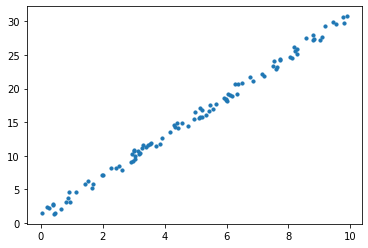

In [65]:
plt.scatter(x,y, s=10)

### 2. 모델 클래서 생성 (차원변경이 딥러닝의 핵심)
### 3. 모델 인스턴스 생성과 하이퍼 파라미터선택

In [11]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

In [12]:
# from sklearn.linear_model import LinearRegression
# regr = LinearRegression(fit_intercept = True)

### 4. 특징행렬과 대상 벡터준비

In [13]:
X = x.reshape(-1,1)
X.shape, y.shape

((100, 1), (100,))

### 5. 모델을 데이터에 적합

In [14]:
regr.fit(X,y) # X,y에 맞는 선형회귀 모델을 적합(모델생성)

LinearRegression()

In [15]:
regr.coef_ #모델의 기울기

array([2.9855087])

In [16]:
regr.intercept_ #모델 y의 절편

0.9878534341975644

### 6.새로운 데이터를 이용해 예측

In [19]:
x_new = np.linspace(-1,11, num=100) # 테스트값 설정

In [20]:
x_new[:5]

array([-1.        , -0.87878788, -0.75757576, -0.63636364, -0.51515152])

In [21]:
x_new.shape

(100,)

In [22]:
X_new = x_new.reshape(-1,1) 
X_new.shape #훈련용과 같은 형태로 만들어야함

(100, 1)

In [23]:
y_pred = regr.predict(X_new)

In [27]:
x_new[:5]

array([-1.        , -0.87878788, -0.75757576, -0.63636364, -0.51515152])

In [28]:
y_pred[:5]

array([-1.99765526, -1.63577542, -1.27389558, -0.91201574, -0.5501359 ])

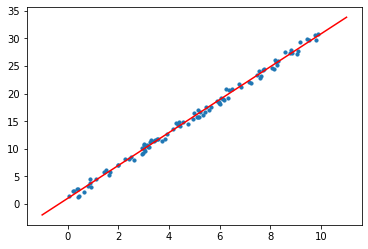

In [29]:
plt.plot(x_new, y_pred, c="red")
plt.scatter(x,y,s=10)

### 7. 모델 평가

In [30]:
# 결과와 예측값이 가장 적은 것을 선택

In [32]:
#절대값 후 다 더 한 값과 제곱후 다 더한 값에 루트를 한 값을 비교하여 
#값이 비슷하면 제대로 도출된 값이다.

In [66]:
# 데이터 읽어오기
from sklearn.datasets import load_iris

iris = load_iris()
type(iris)

x = iris.data
y = iris.target

In [69]:
x[5]

array([5.4, 3.9, 1.7, 0.4])

In [70]:
y[5]

0

In [67]:
#KNN 모델 선택
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [68]:
# 모델 훈련 (학습)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

In [71]:
y_pred = knn.predict(X)

In [77]:
np.mean(y == y_pred) #ndarrayd의 특징/ 1이 나온것은 overfit으로 새로운 데이터가 들어올 경우 맞추지 못할 확률이 높다

1.0

In [73]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [74]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [76]:
#실제값과 예측결과값 비교
y == y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [90]:
X_train.shape,y_train.shape, X_test.shape, y_test.shape

((120, 4), (120,), (30, 4), (30,))

In [91]:
X_train[:5]

array([[6.5, 2.8, 4.6, 1.5],
       [5.7, 2.5, 5. , 2. ],
       [7.7, 3. , 6.1, 2.3],
       [5. , 3.6, 1.4, 0.2],
       [6.4, 3.2, 5.3, 2.3]])

In [92]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [94]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [96]:
y_pred = knn.predict(X_test)
y_pred

array([0, 2, 2, 1, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2, 1, 1, 1, 1,
       1, 0, 0, 2, 1, 2, 2, 0])

In [97]:
np.mean(y_test == y_pred)

0.9

In [98]:
knn.score(X_test, y_test)

0.9

In [99]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9

In [110]:
# 데이터 읽어오기
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
type(iris)

x = iris.data
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)
#random_state=25 고정시키지 않으면 결과값을 낼때마다 결과값을 다르게 준다.
#이유는 프로그램에서 랜덤으로 데이터를 섞은 후 결과를 내기 때문
# test_size의 경우 훈련량을 조절 하는 것이다. ex)7:3일 경우 훈련량 7 테스트 3

knn = KNeighborsClassifier(n_neighbors=1)

accuracy_score(y_test, y_pred)

0.9

### 하이퍼파라미터의 선택

In [108]:
train_accuracy = []
test_accuracy = []

neighbors = range(1,30) #range(1,20,2) 등 아무거나 가능하다

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)
    
    print("n = ", n, "tain = ", knn.score(X_train, y_train), "test = ",knn.score(X_test, y_test))
    
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

n =  1 tain =  1.0 test =  0.9
n =  2 tain =  0.9833333333333333 test =  0.9
n =  3 tain =  0.975 test =  0.9333333333333333
n =  4 tain =  0.975 test =  0.9
n =  5 tain =  0.9833333333333333 test =  0.9333333333333333
n =  6 tain =  0.9833333333333333 test =  0.9333333333333333
n =  7 tain =  0.9833333333333333 test =  0.9666666666666667
n =  8 tain =  0.975 test =  0.9666666666666667
n =  9 tain =  0.975 test =  0.9666666666666667
n =  10 tain =  0.9666666666666667 test =  0.9333333333333333
n =  11 tain =  0.9833333333333333 test =  0.9666666666666667
n =  12 tain =  0.9833333333333333 test =  0.9666666666666667
n =  13 tain =  0.9833333333333333 test =  0.9666666666666667
n =  14 tain =  0.9833333333333333 test =  1.0
n =  15 tain =  0.975 test =  0.9666666666666667
n =  16 tain =  0.975 test =  1.0
n =  17 tain =  0.975 test =  1.0
n =  18 tain =  0.975 test =  1.0
n =  19 tain =  0.975 test =  1.0
n =  20 tain =  0.975 test =  1.0
n =  21 tain =  0.975 test =  0.9666666666666667


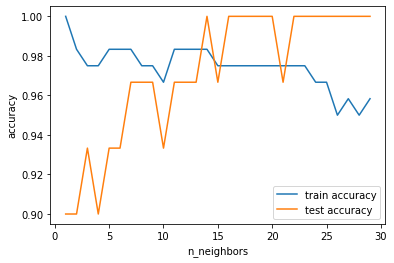

In [109]:
import matplotlib.pyplot as plt

plt.plot(neighbors, train_accuracy, label = "train accuracy")
plt.plot(neighbors, test_accuracy, label = "test accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.legend()

## 교차검증 (최적의 모델을 찾기위해)

In [112]:
from sklearn.datasets import load_iris
iris = load_iris()
X=iris.data
y=iris.target

In [113]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [115]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,X,y, cv=5) # 교차검증수행(cv=5, 5번)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [116]:
X1,y1 = load_iris(return_X_y=True)
print(X1.shape)
print(y1.shape)

(150, 4)
(150,)


In [ ]:
from sklearn import datasets


In [117]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model,X,y,cv=LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [158]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs))

In [170]:
import numpy as np

def make_data(N, err=1.0, seed=1):
    np.random.seed(seed)
    X = np.random.rand(N, 1) **2
    y= 10-1/(X.ravel()+0.1)
    
    if err > 0:
        y += err*np.random.randn(N)
    return X,y

X,y = make_data(40)

In [160]:
X.shape

(40, 1)

In [161]:
X[:5]

array([[1.73907352e-01],
       [5.18867376e-01],
       [1.30815988e-08],
       [9.14049845e-02],
       [2.15372915e-02]])

In [162]:
X.ravel()[:5]

array([1.73907352e-01, 5.18867376e-01, 1.30815988e-08, 9.14049845e-02,
       2.15372915e-02])

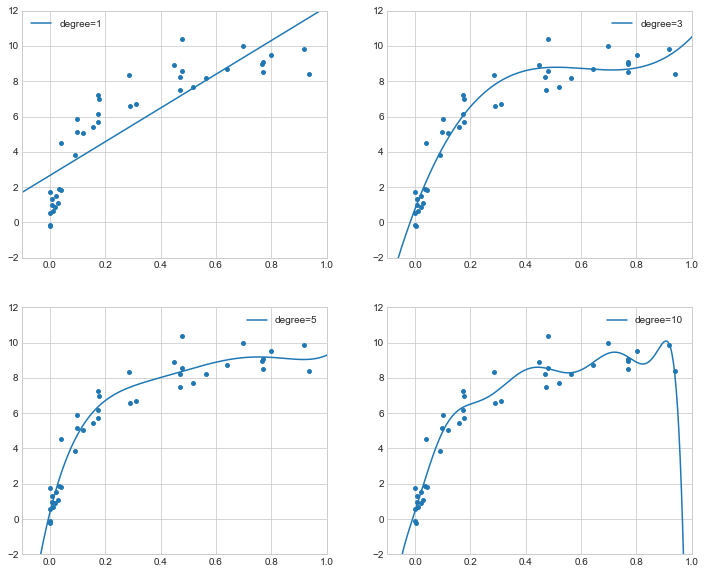

In [171]:
import matplotlib.pyplot as plt

plt.style.use("seaborn-whitegrid")

X_test = np.linspace(-0.1,1.1,500).reshape(-1,1)

fig = plt.figure(figsize=(12,10))
for i, degree in enumerate([1,3,5,10],start=1):
    ax = fig.add_subplot(2,2,i)
    ax.scatter(X.ravel(),y,s=15)
    y_test = make_pipeline(PolynomialFeatures(degree),LinearRegression()).fit(X,y).predict(X_test)
    
    ax.plot(X_test.ravel(),y_test, label="degree={0}".format(degree))
    ax.set_xlim(-0.1,1.0)
    ax.set_ylim(-2,12)
    ax.legend(loc="best");

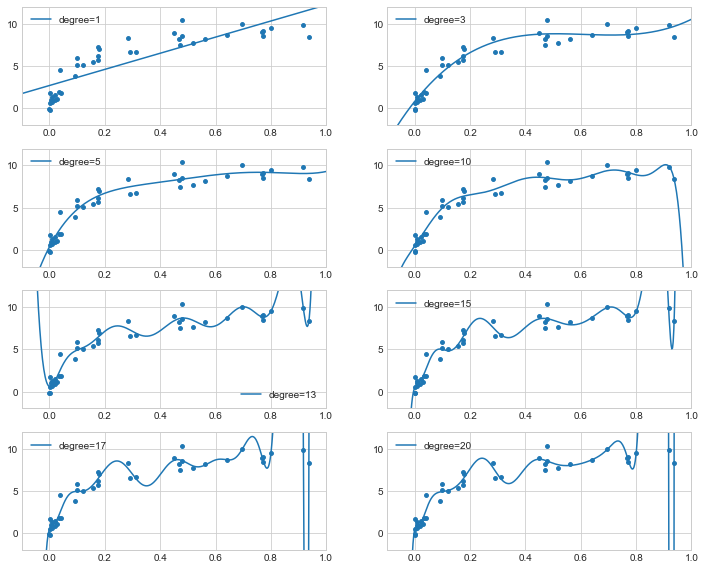

In [172]:
import matplotlib.pyplot as plt

plt.style.use("seaborn-whitegrid")

X_test = np.linspace(-0.1,1.1,500).reshape(-1,1)

fig = plt.figure(figsize=(12,10))
for i, degree in enumerate([1,3,5,10,13,15,17,20],start=1):
    ax = fig.add_subplot(4,2,i)
    ax.scatter(X.ravel(),y,s=15)
    y_test = make_pipeline(PolynomialFeatures(degree),LinearRegression()).fit(X,y).predict(X_test)
    
    ax.plot(X_test.ravel(),y_test, label="degree={0}".format(degree))
    ax.set_xlim(-0.1,1.0)
    ax.set_ylim(-2,12)
    ax.legend(loc="best");

In [139]:
for i, degree in enumerate([1,3,5,10,13,15,17,20],start=1):
    print("i",)

i
i
i
i
i
i
i
i


## 그리드 서치 (최적의 모델 찾기)

In [182]:
from sklearn.model_selection import GridSearchCV

param_grid = {"polynomialfeatures__degree":np.arange(21),
             "linearregression__fit_intercept": [True, False],
             "linearregression__normalize": [True,False]}

grid = GridSearchCV(PolynomialRegression(),param_grid, cv=7)

In [183]:
grid.fit(X,y)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearregression__normalize': [True, False],
                         'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])})

In [184]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

(-0.04687651021505175,
 0.9844070023112612,
 -0.7308177116555796,
 10.902869392322714)

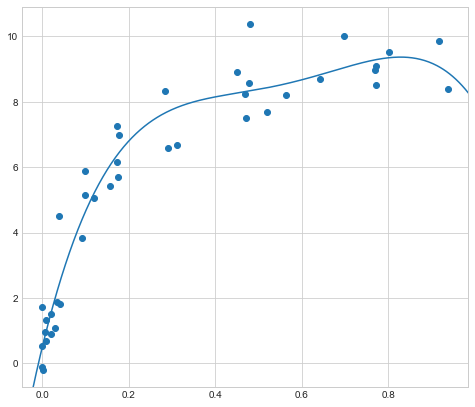

In [193]:
model = grid.best_estimator_

plt.figure(figsize=(8,7))
plt.scatter(X.ravel(),y)
lim = plt.axis()
y_test = model.fit(X,y).predict(X_test)
plt.plot(X_test.ravel(),y_test);
plt.axis(lim)

In [186]:
dir(grid)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_check_is_fitted',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'in

In [194]:
# 모델 저장 & 복원

In [197]:
import pickle
s = pickle.dumps(model)

In [201]:
import time
time.time()

1610440753.6473618

In [203]:
from joblib import dump, load
import time
#훈련된 모델을 외부 파일로 저장
dump_name = "model_" + str(time.time())+".joblib"
dump(model,dump_name)
# dump(model, "model_210112.joblib")

['model_1610440898.802588.joblib']

In [ ]:
#모델 복원
model2 = load